In [112]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Читать изображение

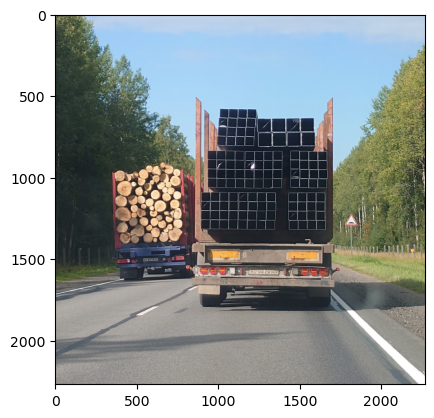

In [113]:
src = cv.imread(r"D:\Projects\Pycharm_projects\CV\lab02\task2\logs-3.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
plt.imshow(src)

# Преобразовать в черно-белое изображение

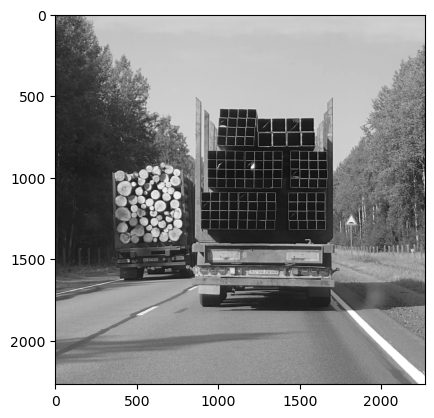

In [114]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))
plt.imshow(gray, 'gray')
plt.show()

# Обрезать изображение

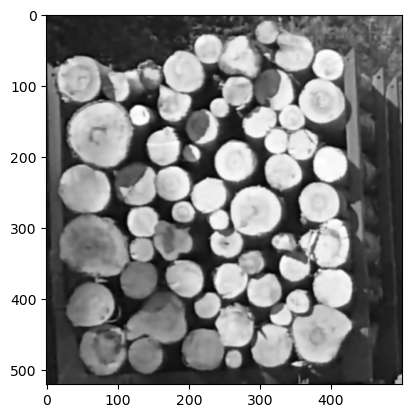

In [115]:
import matplotlib.pyplot as plt

size1 = 500
size2 = 520
x1 = 350
y1 = 900
x2 = x1 + size1
y2 = y1 + size2

cut = gray[y1:y2, x1:x2]


plt.imshow(cut, cmap='gray')
plt.show()


# Использовать преобразование Хафа (HOUGH_GRADIENT_ALT) для обнаружения кругов на изображении

In [116]:
from cv2 import HOUGH_GRADIENT_ALT  

detected_circles = cv.HoughCircles(
    cut,                         
    HOUGH_GRADIENT_ALT,           
    1.7,                          
    25,                           
    param1=260,                   
    param2=0.6,                   
    minRadius=10, maxRadius=100  
)


Total pipes:  53


(-0.5, 499.5, 519.5, -0.5)

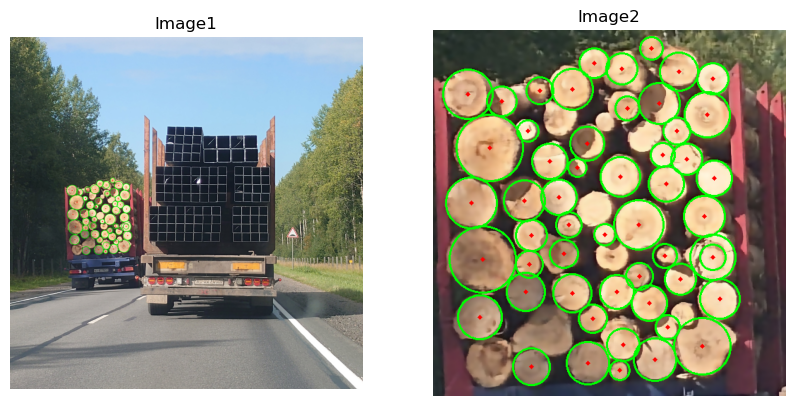

In [117]:
image = src.copy()
pipes_count = 0

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))  

    for points in detected_circles[0, :]:
        a, b, r = points[0] + x1, points[1] + y1, points[2]  

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1


print("Total pipes: ", pipes_count)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image)
axs[0].set_title('Image1')
axs[0].axis('off')  

cut1 = image[y1:y2, x1:x2]

axs[1].imshow(cut1, cmap='gray')
axs[1].set_title('Image2')
axs[1].axis('off')  
